In [1]:
##import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
##read the file
df=pd.read_csv('all_month.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


In [4]:
#check nan
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

<Figure size 500x500 with 0 Axes>

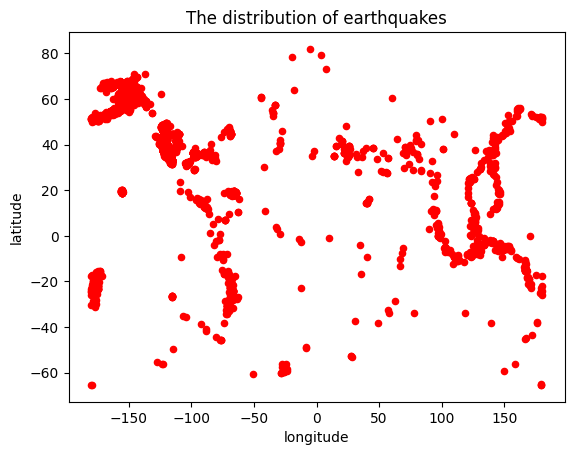

In [5]:
##scatter plot of earthquake distribution 
plt.figure(figsize=(5,5))
df.plot(kind='scatter',x='longitude',y='latitude',color='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('The distribution of earthquakes')
plt.show()

In [10]:
##latitude range of different temperate climate
#Tropic:[-23°27':23°27']
#Temerate Zone:[23°27':66°33'] and [-66°33':-23°27']
#Frigid Zone:[66°33':90°] and[-90°:-66°33']t
## Replace a range of values to specific string
r1 = df['latitude'].between(-23.27,23.27)
r2 = df['latitude'].between(23.27, 66.33)
r3 = df['latitude'].between(-66.33, -23.27)
r4 = df['latitude'].between(66.33,90)
r5= df['latitude'].between(-90,-66.33)
df['latitude'] = np.select([r1, r2, r3,r4,r5], ['Tropic Zone','Northern Temperate Zone','Southern Temperate Zone','Northern Frigid Zone','Southern Frigid Zone'], default=None)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,Northern Temperate Zone,-118.392667,3.86,1.02,ml,15.0,101.00,0.171300,0.1500,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,Northern Temperate Zone,-122.801666,2.55,1.89,md,32.0,33.00,NaN,0.0200,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,Northern Temperate Zone,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.5000,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,Tropic Zone,-155.420502,29.02,2.09,md,31.0,117.00,NaN,0.1900,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,Northern Temperate Zone,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.1300,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,2022-12-23T02:44:45.937Z,Northern Temperate Zone,-150.606500,127.70,2.00,ml,NaN,NaN,NaN,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,Northern Temperate Zone,-117.813900,7.90,1.40,ml,16.0,133.87,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.60,0.300,4.0,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,Northern Temperate Zone,-122.791664,1.50,1.13,md,24.0,45.00,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.19,0.35,0.130,24.0,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,Northern Temperate Zone,-153.228800,7.10,1.60,ml,NaN,NaN,NaN,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak


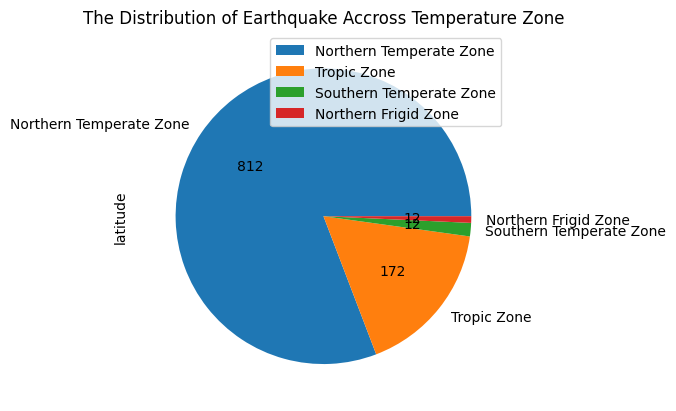

In [11]:
## Pie Chart of Earthequake distribution across Teperature Zone
distribution=pd.DataFrame(df['latitude'].value_counts())
distribution.reset_index(inplace=True)
fig,ax=plt.subplots()
distribution.plot(kind='pie',y='latitude',labels=distribution['index'],autopct='%1.f2',ax=ax)
ax.title.set_text('The Distribution of Earthquake Accross Temperature Zone')